In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

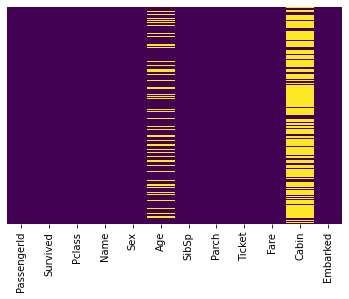

In [10]:
sns.heatmap(train.isna(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

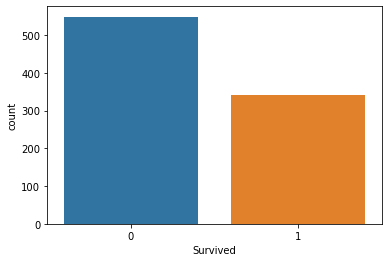

In [11]:
sns.countplot(x="Survived", data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

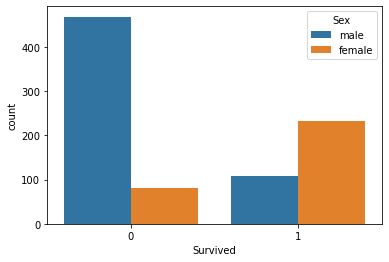

In [12]:
sns.countplot(x="Survived", hue="Sex", data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

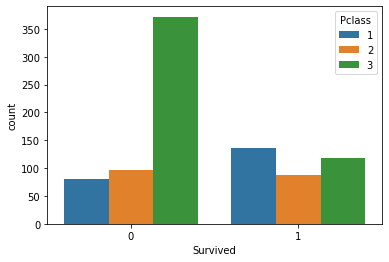

In [13]:
sns.countplot(x="Survived", hue="Pclass", data=train)

C:\Users\SivaPrathi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

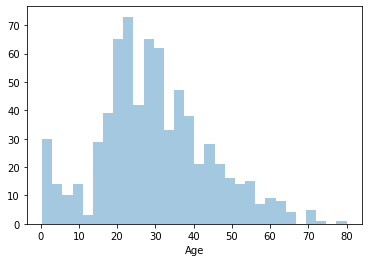

In [19]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

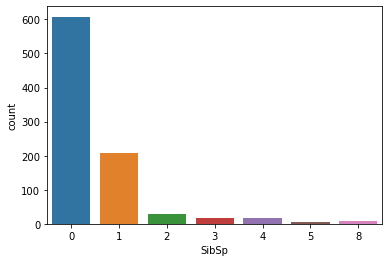

In [20]:
sns.countplot(x="SibSp", data=train)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

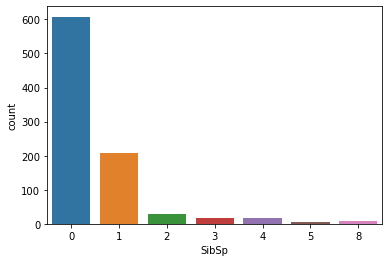

In [22]:
sns.countplot(x=train["SibSp"])

<AxesSubplot:>

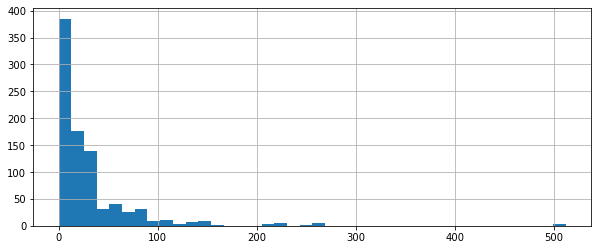

In [26]:
train["Fare"].hist(bins=40, figsize=(10,4))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

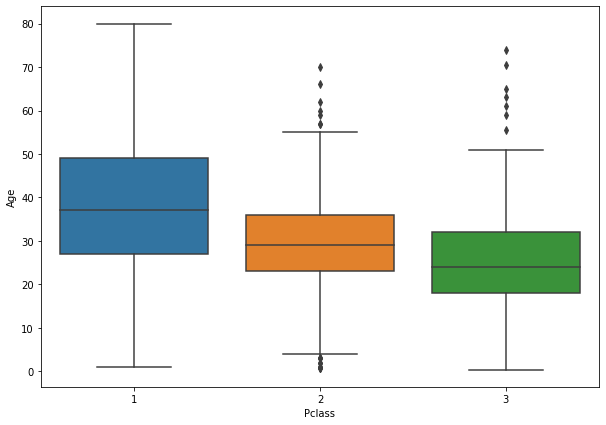

In [28]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Pclass", y="Age", data=train)

In [3]:
def input_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age        

In [4]:
train["Age"] = train[["Age", "Pclass"]].apply(input_age, axis = 1)

<AxesSubplot:>

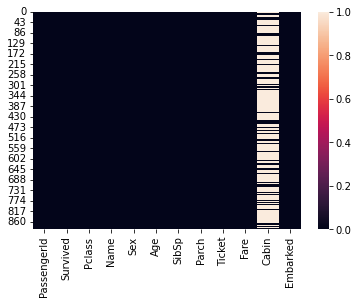

In [38]:
sns.heatmap(train.isnull())

In [5]:
train.drop("Cabin", axis=1, inplace=True)

<AxesSubplot:>

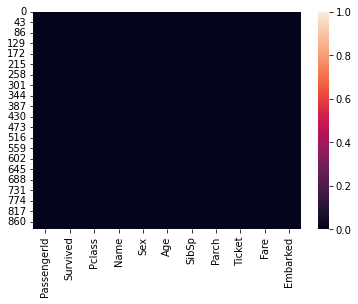

In [41]:
sns.heatmap(train.isnull())

In [6]:
train.dropna(inplace=True)

In [11]:
sex = pd.get_dummies(train["Sex"], drop_first=True)

In [12]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [45]:
embark = pd.get_dummies(train["Embarked"], drop_first=True)

In [47]:
train = pd.concat([train, sex, embark], axis=1)

In [48]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [50]:
train.drop(["Sex", "Embarked", "Name", "Ticket"], axis=1, inplace=True)

In [52]:
train.drop("PassengerId", axis=1, inplace=True)

In [53]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [54]:
from sklearn.model_selection import train_test_split

In [13]:
y = train["Survived"]

In [56]:
X = train.drop("Survived", axis=1)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=101)

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
lm = LogisticRegression()

In [61]:
lm.fit(X_train, y_train)

C:\Users\SivaPrathi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
predictions = lm.predict(X_test)

In [64]:
from sklearn.metrics import classification_report

In [65]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [66]:
from sklearn.metrics import confusion_matrix

In [67]:
confusion_matrix(y_test, predictions)

array([[147,  16],
       [ 30,  74]], dtype=int64)

In [68]:
confusion_matrix()

array([[147,  30],
       [ 16,  74]], dtype=int64)

In [ ]:
lm.fit()